In [1]:
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
from palettable.colorbrewer.qualitative import Pastel1_7

from scipy.stats import ttest_ind

font= matplotlib.font_manager.FontProperties(fname= 'C:\Windows\\Fonts\\BareunBatangL.ttf').get_name()
matplotlib.rc('font', family=font)  


### 데이터를 로드하고 클러스터링에 활용할 수 있는 형태로 변환함

In [2]:
df= pd.read_pickle('./pkl_result/item_selected_by_middleline.pkl')

In [3]:
df_raw= pd.read_table('./Pre_processed_data/merged_dataframe_shopping.csv', delimiter= ',', encoding='euc-kr')

In [4]:
df_label= pd.read_pickle('./pkl_result/data_tSNE_dim2_perplex30.pkl')

In [5]:
df.head()

,H&B선물세트,VIDEOGAME,가공식품,가공우유,가구,가방브랜드,계절완구,고급,고양이용품,골프,...,필기용품,한방차,한우선물세트,해초,헬스용품,호주산소고기,홍인삼,화과자,황태,훼이셜케어
ID,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,6.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,3.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0
4,0.0,0.0,38.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,0.0,1.0,0.0,0.0


In [6]:
df_raw.head()

,Unnamed: 0,ID,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,BUY_AM,BUY_CT,AGE_PRD,HOM_PST_NO,...,PD_M_NM,PD_H_NM,IS_MALE,IS_FEMALE,YEAR,MONTH,DAY,HOUR,PRVIN,DESTRICT
0,0,4008,2108,A01,215,2,59600,2,50,056,...,캐주얼,여성의류,0,1,2015,2,16,13,서울특별시,송파구
1,1,6379,2109,A01,75,29,35000,1,40,480,...,건강식품,식품,1,0,2015,2,13,11,부산광역시,해운대구
2,2,6379,2109,A01,149,4,85000,1,40,480,...,화장품,잡화,1,0,2015,1,15,10,부산광역시,해운대구
3,3,8002,2110,A01,138,10,25000,1,30,300,...,섬유잡화,잡화,0,1,2015,12,20,10,세종특별자치시,NaN
4,4,8002,2110,A01,138,10,21000,1,30,300,...,섬유잡화,잡화,0,1,2015,12,20,10,세종특별자치시,NaN


In [7]:
df_raw.drop('Unnamed: 0', axis= 1, inplace= True)

In [8]:
df_grouped= df_raw.sort_values('ID')

In [9]:
agg_func= {'RCT_NO': 'count', 'BIZ_UNIT': lambda x: x.nunique(), 'PD_S_C': lambda x: x.nunique(), \
           'BR_C': lambda x: x.nunique(), 'BUY_AM': 'sum'}

In [10]:
df_grouped= df_grouped.groupby('ID').agg(agg_func)

In [11]:
df_grouped.head()

,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,BUY_AM
ID,,,,,
1,55,2,33,3,3695930
2,259,2,111,3,1979142
3,109,3,61,7,2272884
4,308,3,136,7,7970116
6,946,4,253,9,6458914


In [12]:
df_label.index= df.index

In [13]:
plot_pt= df_label[[0,1]]

In [14]:
df_label.drop([0,1], axis= 1, inplace= True)

In [15]:
df_label.head()

,y_14_clst,y_28_clst,y_24_clst
ID,,,
1,3,9,9
2,10,8,8
3,3,9,9
4,1,4,4
6,5,17,17


In [16]:
ft_dict= {}
for clst in df_label.columns:
    ft_dict[clst]= {}
    for i in range(df_label[clst].nunique()):
        ft_dict[clst][i]= df[df_label[clst]==i]

In [17]:
ft_dict['y_14_clst'][5].head(10)

,H&B선물세트,VIDEOGAME,가공식품,가공우유,가구,가방브랜드,계절완구,고급,고양이용품,골프,...,필기용품,한방차,한우선물세트,해초,헬스용품,호주산소고기,홍인삼,화과자,황태,훼이셜케어
ID,,,,,,,,,,,,,,,,,,,,,
6,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,14.0,0.0,1.0,0.0,0.0
29,0.0,0.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,4.0,1.0
44,0.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
50,0.0,0.0,9.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,1.0,0.0,15.0,14.0,0.0,0.0,0.0
51,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,3.0,0.0,1.0,0.0,0.0,0.0,0.0
56,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
59,0.0,0.0,129.0,8.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,3.0,0.0,24.0,0.0,0.0,3.0,0.0
112,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
114,0.0,0.0,37.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [18]:
user_dict= {}
for clst in df_label.columns:
    user_dict[clst]= {}
    user_dict[clst]['summary']= pd.DataFrame(columns= df_grouped.columns)
    for i in range(df_label[clst].nunique()):
        user_dict[clst][i]= df_grouped[df_label[clst]==i]
        user_dict[clst]['summary'].loc[i]= user_dict[clst][i].mean(axis= 0)

In [19]:
user_dict['y_14_clst'][0].head(10)

,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,BUY_AM
ID,,,,,
23,6,1,4,2,61500
25,15,1,7,1,724300
26,108,2,42,4,1545640
32,5,1,5,2,404800
33,2,1,1,1,110600
41,4,1,4,1,32100
43,7,1,6,2,853670
55,5,1,2,1,198404
60,1,1,1,1,8400


### 각 클러스터의 소비 패턴이나 특징을 파악함.

특히 아래에서는 각 클러스터가 특징적으로 많이/적게 소비한 품목을 t-검정(scipy.stats.ttest_ind)을 통해 확인하였음.

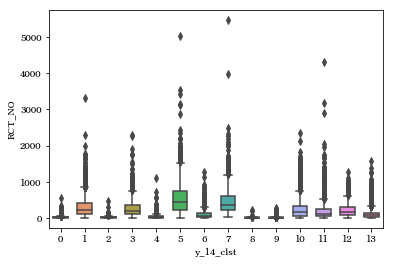

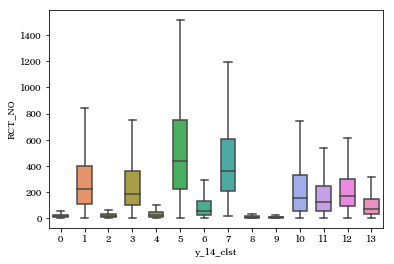

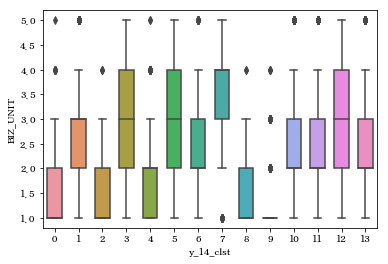

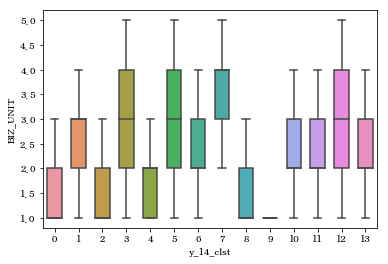

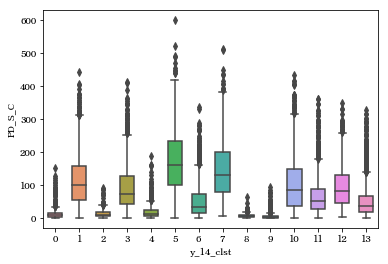

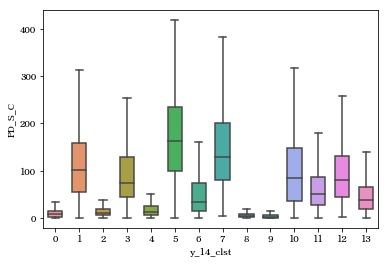

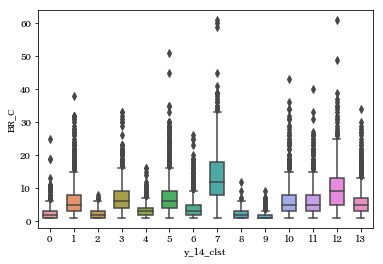

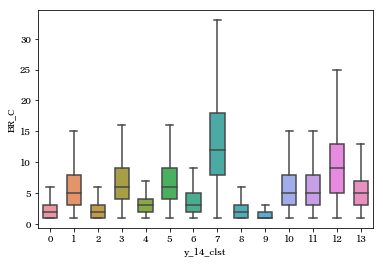

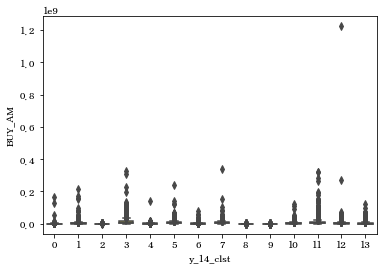

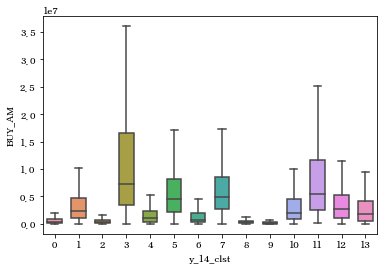

In [20]:
for ft in df_grouped.columns.values.tolist():
    grp= sns.boxplot(x= df_label['y_14_clst'], y= df_grouped[ft], width= 0.6)
    plt.show()
    grp= sns.boxplot(x= df_label['y_14_clst'], y= df_grouped[ft], width= 0.6, showfliers= False)
    plt.show()
    
# 각 클러스터 별 소비 지표를 확인하였음.

In [21]:
prefered_item_dict_05= {}
for i in range(df_label['y_14_clst'].nunique()):
    print('\nfor cluster {}:\n'.format(i))
    prefered_item_dict_05[i]= []
    for item in df.columns.values.tolist():
        (stat_item, p_val_item)=  ttest_ind(ft_dict['y_14_clst'][i][item], df[item], equal_var= False)
        if p_val_item< 0.05 and stat_item>0:
            print('item {} has different mean with total dataset; ({}, {})'.format(item, stat_item, p_val_item))
            prefered_item_dict_05[i].append(item)
            
# t-test를 통해 전체 데이터의 평균과 각 클러스터의 평균을 비교하였음. 이를 통해 유의미하게 각 클러스터에서 평균이 높게 나타나는 품목을 출력하였음.


for cluster 0:

item VIDEOGAME has different mean with total dataset; (2.22246889811911, 0.02645849820833767)

for cluster 1:

item H&B선물세트 has different mean with total dataset; (2.1573629205781932, 0.031058485328196193)
item 가방브랜드 has different mean with total dataset; (2.106830950151888, 0.0352133603856602)
item 고양이용품 has different mean with total dataset; (4.150941636572358, 3.411836618714187e-05)
item 골프 has different mean with total dataset; (2.2071730261334794, 0.02737289884635849)
item 기능성건강 has different mean with total dataset; (4.603736724542285, 4.327068960695245e-06)
item 남성어덜트캐주얼 has different mean with total dataset; (2.7242977180809964, 0.006482060880044682)
item 레스토랑 has different mean with total dataset; (2.317145575053931, 0.020560779269130663)
item 비즈니스정장 has different mean with total dataset; (2.561024814691237, 0.010483202805439728)
item 석류 has different mean with total dataset; (2.2822377954617665, 0.02253997625945878)
item 소가구 has different mean with total data

item 수예시즌 has different mean with total dataset; (5.277548486427809, 1.501688458875649e-07)
item 수입게 has different mean with total dataset; (3.3707875687550026, 0.0007685158265334161)
item 수입돼지고기 has different mean with total dataset; (3.0795494819704126, 0.0021121156269488244)
item 수족관용품 has different mean with total dataset; (3.9245227467752497, 9.064686936381087e-05)
item 슈즈용품 has different mean with total dataset; (2.2191795228518765, 0.0266219571291203)
item 스낵 has different mean with total dataset; (18.138070429191313, 1.5964683821544066e-66)
item 스타킹 has different mean with total dataset; (6.54978076916376, 7.911699931827956e-11)
item 스포츠ACC has different mean with total dataset; (2.3696783293493966, 0.01792943106571417)
item 스포츠슈즈 has different mean with total dataset; (3.5787851728757234, 0.0003562807318027749)
item 스포츠의류 has different mean with total dataset; (2.953068831670948, 0.0031937279429892973)
item 시계 has different mean with total dataset; (3.6151834372676723, 0.00031

item 시즌슈즈 has different mean with total dataset; (2.252355979589599, 0.02453136240068282)
item 시즌행사 has different mean with total dataset; (5.228007430715116, 2.0954908470327137e-07)
item 식빵 has different mean with total dataset; (3.9184765044259495, 9.556630470014345e-05)
item 아동브랜드 has different mean with total dataset; (3.318218590673615, 0.0009390203959578396)
item 아동완구 has different mean with total dataset; (4.800765616769981, 1.8428929646306718e-06)
item 아로마 has different mean with total dataset; (2.2518362594612795, 0.024554692101905536)
item 언더웨어행사 has different mean with total dataset; (3.070113318879127, 0.00219948052700905)
item 여성양말 has different mean with total dataset; (2.71106320709014, 0.006823664936682909)
item 오뎅 has different mean with total dataset; (3.484500962312186, 0.0005159855560701112)
item 우산/양산 has different mean with total dataset; (3.1624754556458474, 0.0016136726901641594)
item 유가공 has different mean with total dataset; (5.065651381698045, 4.8672825644798

item 즉석구이김 has different mean with total dataset; (3.8231094341394787, 0.00013642054697595932)
item 즉석구이안주 has different mean with total dataset; (4.135752363582051, 3.706816359165256e-05)
item 즉석도정미 has different mean with total dataset; (3.366254896562115, 0.0007786211155452583)
item 차 has different mean with total dataset; (5.177738371016726, 2.494346210445899e-07)
item 천연조미료 has different mean with total dataset; (2.75618551976045, 0.005912267048546708)
item 카시트/매트 has different mean with total dataset; (2.939194706587344, 0.003337053680235347)
item 카페 has different mean with total dataset; (2.803198451711603, 0.005114670802110817)
item 캐주얼슈즈 has different mean with total dataset; (3.75531852438556, 0.00017917208548550977)
item 캐주얼화브랜드 has different mean with total dataset; (4.345335215056849, 1.4669795248219616e-05)
item 캠핑 has different mean with total dataset; (2.8693480802007763, 0.0041659044979414465)
item 커튼류 has different mean with total dataset; (2.513289457602738, 0.012051

In [22]:
prefered_item_dict_05

{0: ['VIDEOGAME'],
 1: ['H&B선물세트',
  '가방브랜드',
  '고양이용품',
  '골프',
  '기능성건강',
  '남성어덜트캐주얼',
  '레스토랑',
  '비즈니스정장',
  '석류',
  '소가구',
  '수입게',
  '스낵',
  '스타킹',
  '스포츠슈즈',
  '시즌잡화',
  '시즌행사',
  '시티캐주얼',
  '언더웨어행사',
  '여성양말',
  '여성캐주얼브랜드',
  '유가공',
  '유아용품',
  '육포',
  '이지캐주얼브랜드',
  '일반욕실용품',
  '일반헤어케어',
  '자동차방향제/소취제',
  '자몽',
  '잡화멀티샵',
  '전통주',
  '제습제',
  '조기/명태',
  '조리반찬',
  '즉석구이김',
  '즉석구이안주',
  '즉석도정미',
  '차',
  '천연조미료',
  '캐주얼슈즈',
  '커튼류',
  '튀김',
  '특산물행사',
  '파인애플',
  '포장젓갈',
  '풋/핸드케어',
  '피자',
  '해초',
  '호주산소고기',
  '황태',
  '훼이셜케어'],
 2: [],
 3: ['가공식품',
  '가구',
  '골프',
  '골프용품',
  '과자',
  '남성정장',
  '남성케어',
  '대형가전',
  '모피/피혁',
  '보석',
  '선케어',
  '시티웨어',
  '아이메이크업',
  '준보석/시계',
  '피혁잡화'],
 4: [],
 5: ['H&B선물세트',
  '가공식품',
  '가공우유',
  '가방브랜드',
  '고양이용품',
  '골프',
  '기능성건강',
  '김선물세트',
  '동물병원',
  '드레스화브랜드',
  '라켓스포츠',
  '레스토랑',
  '매트',
  '미시캐주얼',
  '벽지류',
  '봉투보증금',
  '브랜드침구',
  '비즈니스정장',
  '생선초밥',
  '석류',
  '선케어',
  '소가구',
  '수예시즌',
  '수입게',
  '수입돼지고기',
  '수족관용품',
  '슈즈용품',
  '스낵',
 

### 특정한 품목, 특정한 사용자를 중심으로 시각화를 진행하였음.

In [23]:
logmin, logmax= np.log(df['가공식품'].min()+1), np.log(df['가공식품'].max())
newbins= np.logspace(logmin, logmax, 50)

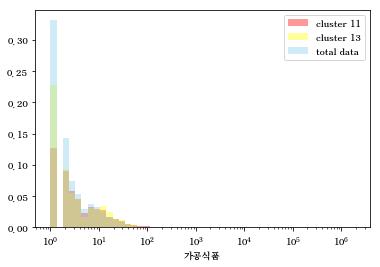

In [24]:
grp= sns.distplot(ft_dict['y_14_clst'][11]['가공식품'], color= 'red', bins= newbins, label= 'cluster 11', kde= False, norm_hist= True)
grp= sns.distplot(ft_dict['y_14_clst'][13]['가공식품'], color= 'yellow', bins= newbins, label= 'cluster 13', kde= False, norm_hist= True)
grp= sns.distplot(df['가공식품'], color= 'skyblue', bins= newbins, label= 'total data', kde= False, norm_hist= True)

grp.set_xscale('log')
# grp.set_yscale('log')
plt.legend()
plt.show()

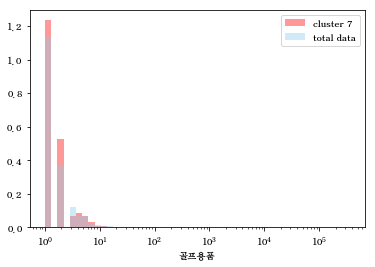

In [25]:
logmin, logmax= np.log(df['골프용품'].min()+1), np.log(df['골프용품'].max())
newbins= np.logspace(logmin, logmax, 50)
grp= sns.distplot(ft_dict['y_14_clst'][7]['골프용품'], color= 'red', bins= newbins, label= 'cluster 7', kde= False, norm_hist= True)
# grp= sns.distplot(ft_dict['y_14_clst'][11]['골프용품'], color= 'yellow', bins= newbins, label= 'cluster 11', kde= False, norm_hist= True)
grp= sns.distplot(df['골프용품'], color= 'skyblue', bins= newbins, label= 'total data', kde= False, norm_hist= True)

grp.set_xscale('log')
# grp.set_yscale('log')
plt.legend()
plt.show()

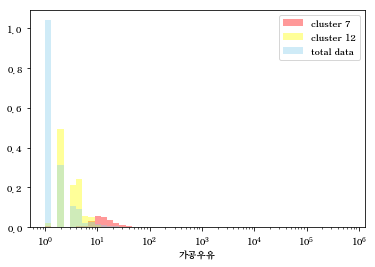

In [26]:
logmin, logmax= np.log(df['가공우유'].min()+1), np.log(df['가공우유'].max())
newbins= np.logspace(logmin, logmax, 50)
grp= sns.distplot(ft_dict['y_14_clst'][7]['가공우유'], color= 'red', bins= newbins, label= 'cluster 7', kde= False, norm_hist= True)
grp= sns.distplot(ft_dict['y_14_clst'][12]['가공우유'], color= 'yellow', bins= newbins, label= 'cluster 12', kde= False, norm_hist= True)
grp= sns.distplot(df['가공우유'], color= 'skyblue', bins= newbins, label= 'total data', kde= False, norm_hist= True)

grp.set_xscale('log')
# grp.set_yscale('log')
plt.legend()
plt.show()

In [27]:
df_grouped[df_label['y_14_clst']== 13]

,RCT_NO,BIZ_UNIT,PD_S_C,BR_C,BUY_AM
ID,,,,,
10,16,1,8,1,351800
15,86,3,43,4,5268800
19,21,4,15,7,1467900
24,70,2,46,3,7946686
27,100,2,30,6,2187410
28,54,3,40,8,921276
35,98,2,48,7,1810650
47,160,4,83,7,2043236
75,23,1,19,1,119982


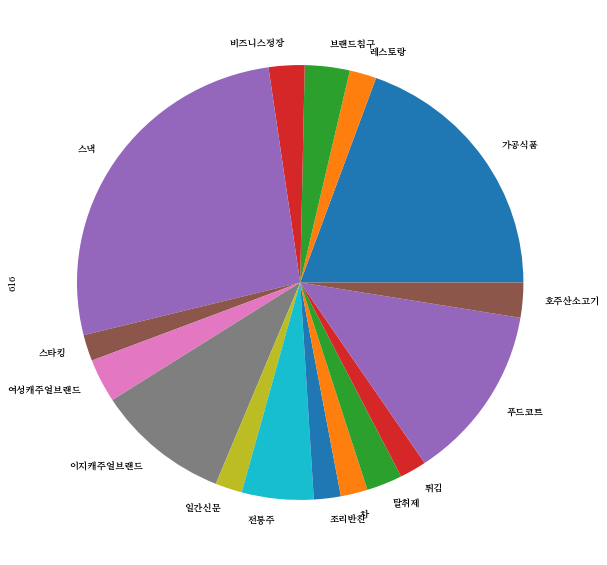

In [34]:
df.loc[616, df.loc[616, :]>2].plot(kind= 'pie', figsize= (10,10)) #Cluster 10
plt.show()

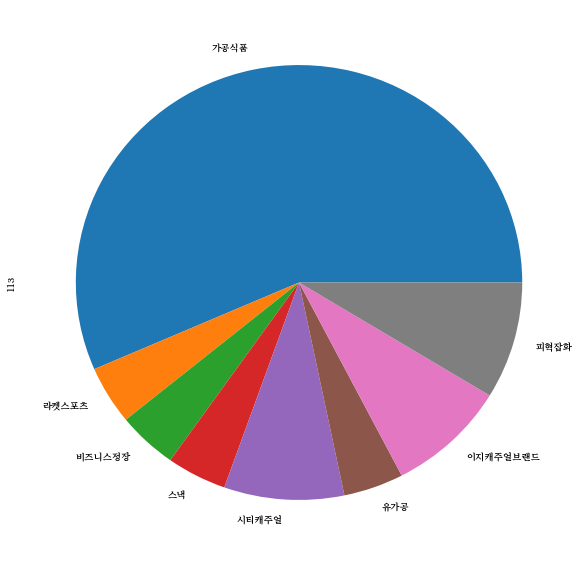

In [35]:
df.loc[113, df.loc[113, :]>0].plot(kind= 'pie', figsize= (10,10)) #Cluster 11
plt.show()

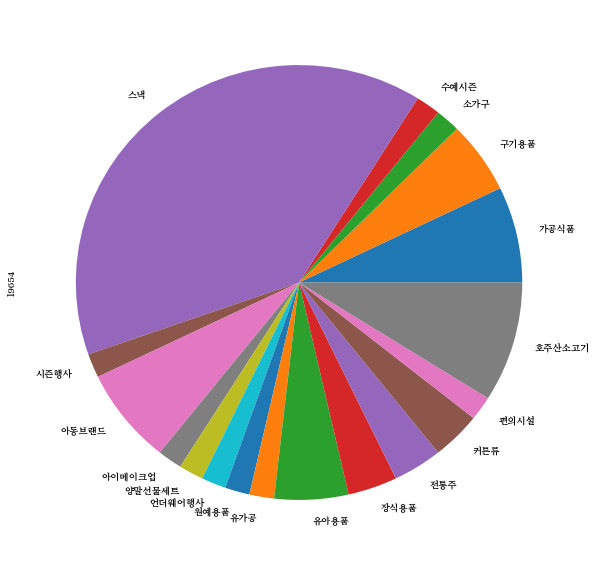

In [36]:
df.loc[19654, df.loc[19654, :]>0].plot(kind= 'pie', figsize= (10,10)) #Cluster 1
plt.show()

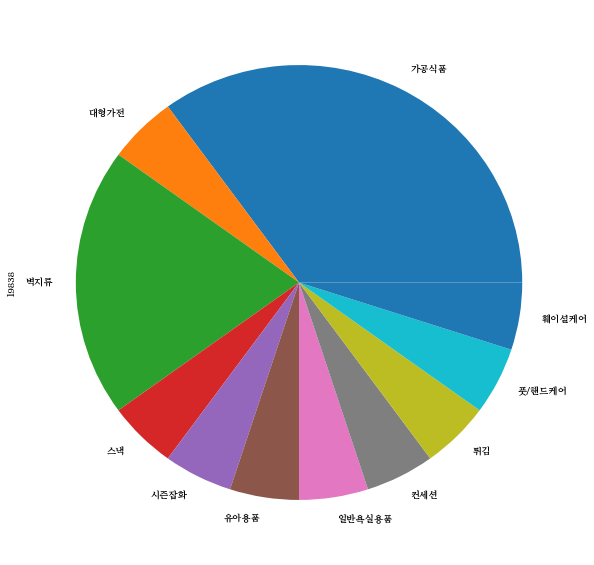

In [37]:
df.loc[19838, df.loc[19838, :]>0].plot(kind= 'pie', figsize= (10,10)) #Cluster 13
plt.show()